<center>
<img src="http://image.yes24.com/goods/87039632/800x0" width="200" height="200"><br>
</center>


 - Github: [yoonkt200](https://github.com/yoonkt200/python-data-analysis)

# 3.2 비트코인 시세 예측하기

다음으로 살펴볼 예제는 비트코인 시세 예측이다. 비트코인 시세처럼 연속적인 시간에 따라 다르게 측정되는 **시계열 데이터**라고 한다. 이를 분석하는 것을 '시계열 데이터 분석'이라고 한다. 시계열 데이터 분석은 심작 박동 데이터처럼 규칙적 시계열 데이터를 분석하는 것과 비트코인 시세 예측처럼 불규칙적 시계열 데이터를 분석하는 것으로 구분할 수 있다.

#### Step 1 탐색: 시간 정보가 포함된 데이터 살펴보기

우선 비트코인 데이터를 탐색한다. 다음 코드로 데이터셋을 살펴보면, 비트코인 데이터 총 365개의 행으로 이루어진 것으로 알 수 있다. 또한 데이터는 결측값 없이 날자와 가격에 대한 2개의 피처로 구성되어 있다. 이러한 데이터셋을 **시계열 데이터셋**이라고 한다.

- market price 데이터셋의 기본 정보 구하기

In [3]:
# -*- coding:utf -8 -*-
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Source: https://www.blockchain.com/ko/charts/market-price?timespan=60days

file_path = './data/market-price.csv'
bitcoin_df = pd.read_csv(file_path, names = ['day', 'price'])

# 기본 정보를 출력한다.
print(bitcoin_df.shape)
print(bitcoin_df.info())
bitcoin_df.tail()

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     365 non-null    object 
 1   price   365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


,day,price
360,2018-08-22 00:00:00,6575.229167
361,2018-08-23 00:00:00,6434.881667
362,2018-08-24 00:00:00,6543.645714
363,2018-08-25 00:00:00,6719.429231
364,2018-08-26 00:00:00,6673.274167


그리고 아래의 코드는 시계열 정보를 데이터 프레임의 index로 설정하여 가격의 추이를 시각화한 것이다.

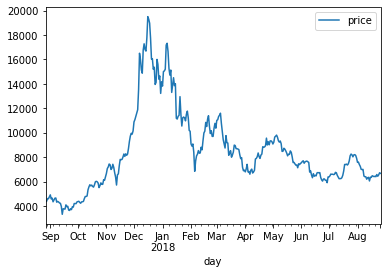

In [4]:
# to_datetime으로 day 피처를 시계열 피처로 변환한다.
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])

# day 데이터 프레임의 index로 설정한다.
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace = True)

# 일자별 비트코인 시세를 시각화한다.
bitcoin_df.plot()
plt.show()

#### Step 2 예측: 파이썬 라이브러리를 활용해 시세 예측하기

이번 절에서 첫 번째로 사용할 시계열 예측 분석 방법은 **ARIMA** 분석 방법이다. ARIMA는 전통적인 시계열 예측 방법으로 크게 두 가지 개념을 포함하고 있다. 첫 번째는 AR(Autoregression)모델로 자기 자신의 과거를 정보로 사용하는 개념이다. 이는 '현재의 상태는 이전의 상태를 참고해서 계산된다.'라는 아이디어를 전제로 한다. 두 번째 개념은 MA(Moving Average)모델로 '이전 항에서의 오차를 이용하여 현재 항의 상태를 추론 하겠다'라는 방법이다. 그리고 이 둘은 합친 것을 ARMA 모델이라고 하며, 조금 더 나아간 ARIMA모델은 ARMA 모델에 추세 변동의 경향성 까지 반영한 방법이다. 파이썬에서는 statsmodule 모듈로 ARIMA 분석을 수행할 수 있다. 다음 코드는 ARIMA 분석의 실행 과정이다. ARIMA 클래스에 order=(2,1,2)라고 입력되어진 파라미터는 'AR이 몇 번째 과거까지를 바라보는지에 대한 파라미터(2),차분(Difference)에 대한 파라미터(1), MA가 몇 번째 과거가지를 바라보는지에 대한 파라미터(2)'를 의미하는 것이다. 차분이란 현재 상태의 변수에서 바로 전 상태의 변수를 빼주는 것을 의미하며, 시계열 데이터의 불규칙성을 조금이나마 보정해주는 역할을 한다. 또한 앞서 말한 ARIMA 모델의 경향성의 의미한다. 이제 아래의 실행 결과를 분석해보자. 실행 결과의 표를 살펴보면 상수항을 제외한 모든 계수의 p-value가 0.05 이하로 유의미한 것으로 나타난다. 이것은 AR과 MA 모두 2로 설정하는 것이 꽤나 의미 있는 분석 결과를 도출한다는 것이다.

- ARIMA 모델 활용하기: 모델학습

In [5]:
#!pip3 install statsmodels

In [6]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR =2, 차분=1, MA=2) 피라미터로 ARIMA 모델을 학습한다.
model = ARIMA(bitcoin_df.price.values, order = (2,1,2))
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

/home/ubuntu/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2787.553
Method:                       css-mle   S.D. of innovations            512.415
Date:                Tue, 20 Apr 2021   AIC                           5587.107
Time:                        14:15:36   BIC                           5610.490
Sample:                             1   HQIC                          5596.400
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3406     27.794      0.228      0.820     -48.135      60.816
ar.L1.D.y     -0.3790      1.830     -0.207      0.836      -3.966       3.208
ar.L2.D.y      0.1584      1.193      0.133      0.8

/home/ubuntu/.local/lib/python3.6/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


#### ARIMA 분석의 파라미터

예제의 분석 결과와는 별개로 order 파라미터 p,d,q는 일반적인 가이드라인이 존재한다. 보통은 p와 q의 합이 2 미만인 경우, 혹은 p와 q의 곱이 0을 포함한 짝수인 경우가 좋은 파라미터의 조합이라고 알려져 있다.

다음으로 ARIMA 모델의 학습 결과를 알아보겠다. 아래의 실행 결과 중 첫 번째 그래프는 학습한 모델에 학습 데이터셋을 넣었을 때의 시계열 예측 결과이다. plot_predict()라는 함수로 이러한 시각화를 자동으로 수행할 수 있다.

- ARIMA 모델 활용하기 : 모델의 성능 & 예측 결과 시각화

<AxesSubplot:>

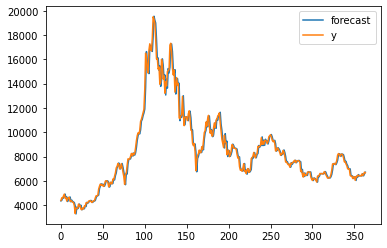

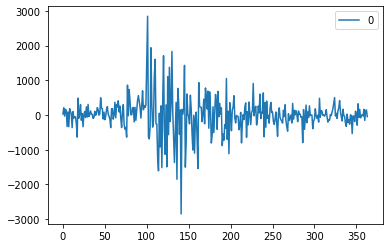

In [7]:
fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과이다.(첫 번째 그래프)
residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동을 시각화 한다. (두 번째 그래프)
residuals.plot()

두 번째 그래프는 실제값과 예측값 사이의 오차 변동을 나타내는 그래프이다. 만약 이 그래프의 폭이 일정하다면 좋은 예측 모델을 학습시킨 것이라고 생각할 수 있다. 하지만 실행 결과에서는 오차 변동이 매우 불안정한 것으로 보인다. 다음으로 ARIMA 모델을 평가해 보자. 모델을 평가하기 위해서는 테스트 전용 데이터가 필요한데 이번 예제에서는 5일 동안의 미래를 테스트 데이터로 사용하겠다. 불규칙적 시계열 예측의 경우에는 먼 미래를 예측하는 것이 큰 의미가 없으므로 '앞으로 N일 동안 어느정도로 상승/하락할 것이다' 정도의 대략적인 경향 예측만을 수행하는 것이 일반적이기 때문이다. 모델 평가의 과정은 다음과 같다.

- model.fit_forecast(step=5)로 향후 5일의 가격을 예측하여 pred_y로 정의한다.
- './data/market-price-test.csv'에서 실제 향후 5일의 가격을 test_y로 정의한다.
- 모델이 예측한 상한값,하한값을 pred_y_upper, pred_y_lower로 정의한다.
- 정의한 모든 값을 비교하여 5일 동안의 상승 경향 예측이 얼마나 맞았는지를 평가한다.

- ARIMA 모델 활용하기 : 실제 데이터와의 비교

In [8]:
forecast_data = model_fit.forecast(steps=5) #학습 데이터셋으로 5일 뒤를 예측한다.

# 테스트 데이터셋을 불러온다.
test_file_path = './data/market-price-test.csv'
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds','y'])

pred_y = forecast_data[0].tolist() #마지막 5일의 예측 데이터이다. (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df.y.values # 실제 5일 가격 데이터 이다. (2018-08-27 ~ 2018-08-31)

pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값이다.
pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값이다.
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
    


그리고 다음 코드는 이를 그래프로 시각화한 것이다. 파란색 그래프는 모델이 예상한 최고 가격, 즉 상한가의 그래프이다. 그리고 빨간색은 모델이 예측한 하한가 그래프이고, 초록색은 실제 5일 간의 가격 그래프, 노란색은 모델이 예측한 5일간의 가격 그래프를 나타낸 것이다.

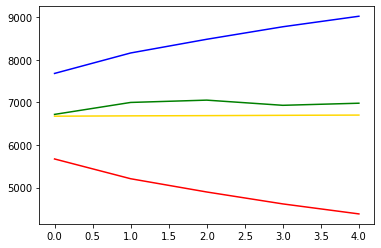

In [9]:
plt.plot(pred_y, color="gold") # 모델이 예측한 가격 그래프이다.
plt.plot(pred_y_lower, color="red") # 모델이 예측한 최저 가격 그래프이다.
plt.plot(pred_y_upper, color="blue")
plt.plot(test_y, color="green")

이번에는 상한가와 하한가를 제외한 뒤, 그래프를 살펴보았다. 그래프의 상승 경향을 살펴보면 그다지 좋지 않은 예측을 한 것으로 보인다. 하지만 '5일 동안 상승할 것이다'라는 아주 큰 트렌드 정도는 예측할 수 있다.

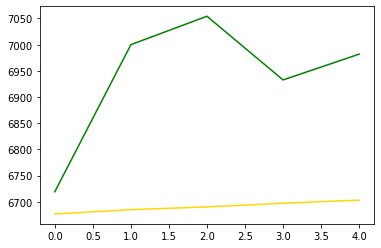

In [10]:
plt.plot(pred_y, color="gold") # 모델이 예상한 가격 그래프이다.
plt.plot(test_y, color="green") # 실제 가격 그래프 이다.

이번에는 ARIMA보다 조금 더 정확한 트렌드 예측 분석을 제공하는 라이브러리 'Facebook Prophet'을 사용해보자. Prophet은 Additive 모델이라는 모델링 방법에 기반한 시계열 예측 모델로서 시계열 데이터의 트렌드성(연간/월간/일간)을 예측하는 것에 초점이 맞추어져 있다. 다음 명령어로 Prophet 라이브러리를 설치해보자.

fbprophet 라이브러리를 사용하기 위해서는 데이터 프레임의 피처를 'ds'와 'y'로 변경해야 한다. 그리고 Prophet이라는 클래스를 선언한 뒤, fit()함수로 모델을 학습시킨다. 모델 생성에 포함되는 파라미터의 의미는 다음과 같다.

- seasonality_mode : 연간,월간,주간,일간 등의 트렌드성을 반영하는 것의 의미하는 파라미터이다.
- changepoint_prior_scale: 트렌드가 변경되는 문맥을 반영하는 파라미터이다. 수치가 높을수록 모델은 과적합에 가까워 진다.

아래 코드는 Facebook Prohet을 활용하여 시계열 모델을 학습하는 코드이다.

- Facebook Prophet 활용하기

In [11]:
#!pip3 install Prophet

In [12]:
from fbprophet import Prophet

# prophet을 사용하기 위해서는 다음과 같이 피처명을 변경해야 한다. : 'ds', 'y'
bitcoin_df = pd.read_csv(file_path, names=['ds', 'y'])

prophet = Prophet(seasonality_mode = 'multiplicative',
                 yearly_seasonality = True,
                 weekly_seasonality = True, daily_seasonality = True,
                 changepoint_prior_scale = 0.5)

prophet.fit(bitcoin_df)

그리고 다음 코드 중 make_future_dataframe(periods=5, freq='d'),prophet.predect(future_data)를 실행하면 학습 데이터셋 기반의 5일 단위 예측 데이터를 얻을 수 있다. 아래의 실행 결과는 데이터에 존재하지 않은 5일 단위의 미래를 예측한 것이다.

In [14]:
# 5일을 내다보며 예측한다.
future_data = prophet.make_future_dataframe(periods=5, freq='d')
forecast_data = prophet.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
365,2018-08-27,6870.046369,6236.506716,7528.536882
366,2018-08-28,6958.173352,6280.140333,7629.721592
367,2018-08-29,6966.981989,6267.562768,7665.142053
368,2018-08-30,7028.094432,6313.339269,7735.393946
369,2018-08-31,7101.738804,6316.853856,7937.118246


다음은 fbprophet 모델의 학습 결과를 시각화한 결과이다. 그래프의 검은 점은 실제 가격을 나타낸 것이고, 파란 선은 예측 가격을 나타낸 것이다. 이 모델 역시 ARIMA 모델과 마찬가지로 학습 데이터셋에 대해서는 거의 정확한 예측을 하고 있다. 하지만 시계열 데이터 분석에서 학습데이터를 잘 예측하는 것은 큰 의미가 없다고 할 수 있다.

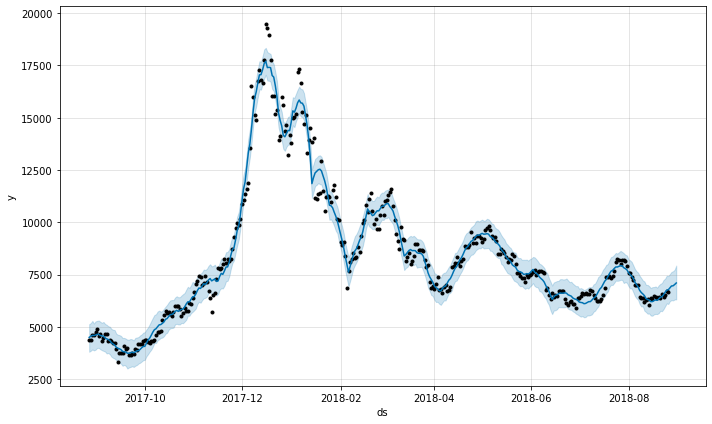

In [15]:
fig1 = prophet.plot(forecast_data)

그리고 다음의 그래프는 fbprophet 에서 제공하는 트렌드 정보 시각화 그래프이다. 앞서 seasonality_mode 파라미터를 설정해 놓은 경우에만 이 시각화가 가능하다. 우리는 이를 통해 시계열 데이터가 어떤 흐름을 가지고 변화하는지를 살펴볼 수 있다. 전체적인 데이터의 트렌드는 아래의 첫 번째 그래프로 살펴볼 수 있고, 이어지는 그래프에서는 year,weekly,daily 순의 트렌드를 확인 할 수 있다.

/home/ubuntu/.local/lib/python3.6/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/home/ubuntu/.local/lib/python3.6/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/home/ubuntu/.local/lib/python3.6/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


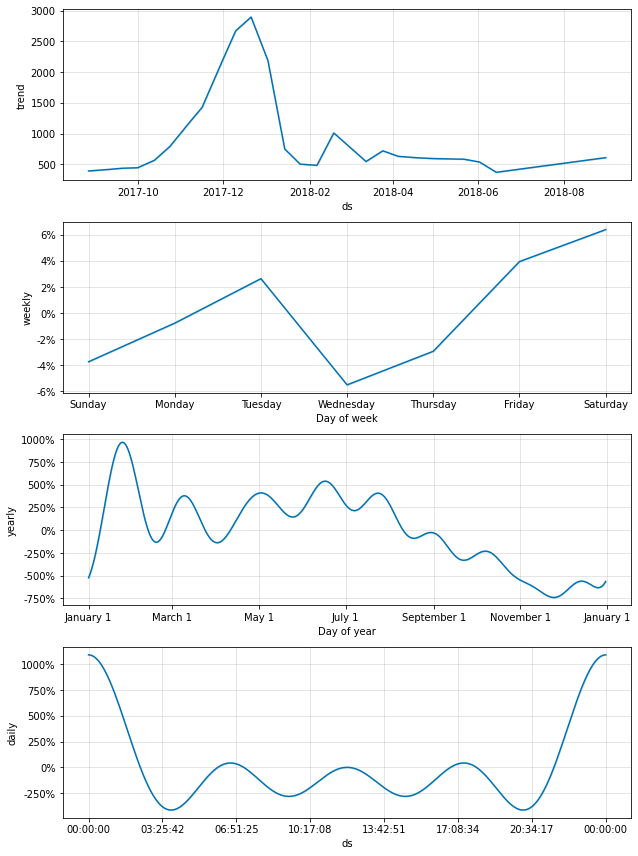

In [16]:
fig2 = prophet.plot_components(forecast_data)

ARIMA 모델을 평가한 것과 동일한 방법으로 테스트 데이터셋을 평가해 보자. 다음 코드의 실행결과, ARIMA 모델보다는 prophet 모델이 실제 price값에 더 근접한 예측을 하는 것처럼 보인다. 이를 RMSE와 함께 더 자세히 살펴보자.

- Facebook Prophet 활용하기 : 실제 데이터와의 비교


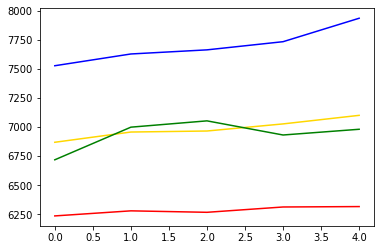

In [20]:
bitcoin_test_df = pd.read_csv(test_file_path, names=['ds', 'y'])

# 마지막 5일의 예측 데이터이다. ( 2018-08-27 ~ 2018~08-31)
pred_y = forecast_data.yhat.values[-5:]

# 실제 5일 가격 데이터이다. (2018-08-27 ~ 2018-08-31)
test_y = bitcoin_test_df.y.values

# 마지막 5일 예측 데이터의 최소값이다.
pred_y_lower = forecast_data.yhat_lower.values[-5:]

# 마지막 5일의 예측 데이터의 최대값이다.
pred_y_upper = forecast_data.yhat_upper.values[-5:]

plt.plot(pred_y, color="gold") # 모델이 예상한 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최저 가격 그래프
plt.plot(pred_y_upper, color = "blue") # 모델이 예상한 최고 가격 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

다음으로 이 모델의 Test RMSE 를 ARIMA 모델과 비교해보자. ARIMA 모델의 Test RMSE는 309 정도 였던 것에 반해 이 모델의 Test RMSE는 101정도로 감소하였다. 또한 '5일 동안 얼마만큼 상승할 것이다'라는 트렌드를 꽤나 정확하게 예측한 것으로 보인다.

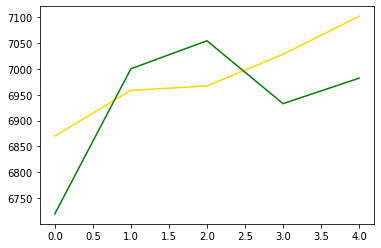

In [22]:
plt.plot(pred_y, color="gold") #모델이 예상한 가격 그래프이다.
plt.plot(test_y, color="green") # 실제 가격 그래프이다.

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [27]:
rmse = sqrt(mean_squared_error(pred_y, test_y))
print(rmse)

105.41853842279897


#### Step 3 활용: 더 나은 결과를 위한 방법

이번 분석 단계에서는 모델의 성능을 조금 더 향상시킬 수 있는 방법들에 대해 알아보겠다. 첫 번재로 고려해볼 방법은 상한값 혹은 하한값을 설정해 주는 것이다. 바닥과 천장이 없는 주가 데이터의 경우에는 의미가 없을 수 있지만 일반적인 시계열 데이터에서는 상한값 혹은 하한값을 설정해 주는 것이 모델의 성능을 높여줄 수 있는 방법 중 하나이다. Prophet 모델에서는 future_data['cap']=20,000을 통해 데이터셋에 상한선을 설정할 수 있다. 다음 코드와 실행 결과는 상한선을 적용한 학습 결과를 시각화한 것이다. 겉으로 보기에는 원래의 결과와 별 차이가 없어 보인다.